# Lab05 Python Data Science with Pandas

In [63]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt

## Part 1 <br /> Basics of Selecting and Slicing Data

In [64]:
# create a pandas dataframe from the location data set
df = pd.read_csv('data/summer-travel-gps-full.csv')
df.head()

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom


In [65]:
# Q1: how to get 2 columns from the dataframe (city and country)?
df[['city',"country"]]

,city,country
0,West Drayton,United Kingdom
1,Hounslow,United Kingdom
2,Hounslow,United Kingdom
3,Hounslow,United Kingdom
4,Hounslow,United Kingdom
...,...,...
1754,Munich,Germany
1755,Munich,Germany
1756,Munich,Germany
1757,Munich,Germany


To get a single "cell's" value out of a dataframe, pass a column name, then a row label. This is equivalent to slicing the dataframe down to a single series, then slicing a single value out of that series using [ ] indexing.

In [66]:
# Q2: how to get the first 5 rows of the "city" column?
df[['city']].head(5)

,city
0,West Drayton
1,Hounslow
2,Hounslow
3,Hounslow
4,Hounslow


### Using .loc[ ]

In [67]:
# Q3: how to use .loc to select the third row of the dataframe?
df.loc[4]

lat                 51.4741
lon               -0.451562
date       05/14/2014 11:38
city               Hounslow
country      United Kingdom
Name: 4, dtype: object

In [68]:
# Q4: how to use .loc to select the first row in "country" column?
df.loc[0,'country']

'United Kingdom'

In [69]:
# Q5: how to select the first 4 rows of ['city', 'date'] columns?
df.loc[:3,['city','date']]

,city,date
0,West Drayton,05/14/2014 09:07
1,Hounslow,05/14/2014 09:22
2,Hounslow,05/14/2014 10:51
3,Hounslow,05/14/2014 11:24


### Using .iloc[ ]

In [70]:
# use .iloc for integer position based indexing
# Q6: how to get the value from the row in position 3 and the column in position 2
df.iloc[3,2]

'05/14/2014 11:24'

In [71]:
# Q7: how to use iloc to select every 300th row from a data set
x = 300
df.iloc[range(0,len(df),x)]

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
300,41.377091,2.151175,05/20/2014 03:18,Barcelona,Spain
600,50.052338,19.946220,05/31/2014 21:10,Krakow,Poland
900,48.561181,9.059672,06/09/2014 15:12,Tübingen,Germany
1200,41.378301,2.187443,06/17/2014 16:37,Barcelona,Spain
1500,42.208201,20.735993,06/30/2014 08:27,Prizren,Kosovo


## Part 2 <br /> How to select rows by some value(s)

In [72]:
# load a reduced set of gps data
df = pd.read_csv('data/summer-travel-gps-simplified.csv')
df.tail()

,lat,lon,date,city,country
173,41.044556,28.983286,07/08/2014 16:44,Istanbul,Turkey
174,41.008992,28.968268,07/08/2014 20:03,Istanbul,Turkey
175,41.043487,28.985488,07/08/2014 22:18,Istanbul,Turkey
176,40.977637,28.823879,07/09/2014 09:03,Istanbul,Turkey
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


In [73]:
# Q9: create a Series of true/false, indicating if each "city" row in the column is equal to "Munich"
df['city']=='Munich'

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177     True
Name: city, Length: 178, dtype: bool

In [74]:
# pandas logical operators are: | for or, & for and, ~ for not
# these must be grouped by using parentheses
# Q10: what cities were visited in spain that were not barcelona? Create a dataframe for it. 
not_bcn = df[(df['country']=='Spain') & ~(df['city']=='Barcelona')]
not_bcn

,lat,lon,date,city,country
24,41.303911,2.105931,05/18/2014 22:35,El Prat de Llobregat,Spain
25,41.289946,2.064590,05/18/2014 23:04,Viladecans,Spain
126,41.306752,2.097624,06/12/2014 17:19,El Prat de Llobregat,Spain
127,41.304333,2.072728,06/12/2014 17:49,El Prat de Llobregat,Spain
131,41.358460,2.128701,06/13/2014 11:35,Hospitalet de Llobregat,Spain
138,41.294761,2.059722,06/20/2014 22:15,Viladecans,Spain


In [75]:
# Q11: select rows where either the city is munich, or the country is serbia
not_bcn = df[(df['country']=='Spain') & ~(df['city']=='Barcelona')]
not_bcn

,lat,lon,date,city,country
24,41.303911,2.105931,05/18/2014 22:35,El Prat de Llobregat,Spain
25,41.289946,2.064590,05/18/2014 23:04,Viladecans,Spain
126,41.306752,2.097624,06/12/2014 17:19,El Prat de Llobregat,Spain
127,41.304333,2.072728,06/12/2014 17:49,El Prat de Llobregat,Spain
131,41.358460,2.128701,06/13/2014 11:35,Hospitalet de Llobregat,Spain
138,41.294761,2.059722,06/20/2014 22:15,Viladecans,Spain


In [76]:
# Q12: how many observations are west of the prime meridian?
len(df[df['lon'] < 0])

24

In [77]:
# Q13: get all rows that contain a city that starts with the letter G
row_mask = df['city'].str.startswith('G')
df[row_mask]

,lat,lon,date,city,country
62,50.273632,18.729429,06/02/2014 06:39,Gliwice,Poland
114,48.282940,8.199630,06/10/2014 13:33,Gutach,Germany
115,48.389029,8.021342,06/10/2014 13:48,Gengenbach,Germany
152,40.187825,20.079303,07/04/2014 17:42,Gjirokastër,Albania


In [78]:
# Q14: how many unique cities and countries in the dataset? 
# Also can you check missing values for the dataframe
len(df.city.unique())
len(df.country.unique())

15

In [79]:
df.isnull().sum()

lat        0
lon        0
date       0
city       0
country    0
dtype: int64

In [80]:
# Q15: group by country name and show the city names in each of the country
gk = df.groupby('country')
gk.head()

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal
2,38.711050,-9.139739,05/14/2014 16:40,Lisbon,Portugal
3,38.715637,-9.120558,05/14/2014 18:25,Lisbon,Portugal
4,38.711977,-9.141788,05/14/2014 19:26,Lisbon,Portugal
5,38.723108,-9.113374,05/15/2014 11:34,Lisbon,Portugal
24,41.303911,2.105931,05/18/2014 22:35,El Prat de Llobregat,Spain
25,41.289946,2.064590,05/18/2014 23:04,Viladecans,Spain
26,41.388325,2.159693,05/19/2014 18:48,Barcelona,Spain
27,41.384696,2.186712,05/19/2014 19:18,Barcelona,Spain


## Part 3 <br /> How to select based on a date-time values

In [81]:
# load the location data set, indexed by the date field
# and, parse the dates so they're no longer strings but now rather Python datetime objects
# this lets us do date and time based operations on the data set
dt = pd.read_csv('data/summer-travel-gps-full.csv', index_col='date', parse_dates=True)
dt.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [82]:
# Q16: is the timestamp index unique? How can you use code to find it? 
dt.index.is_unique

False

In [86]:
# Q17: drop duplicate index 
dt.drop_duplicates(inplace=True)

In [87]:
# Q18: create a weekday and a weekend dataframe
str(list(dt.index.weekday))

'[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [88]:
weekend_mask = (dt.index.weekday==6) | (dt.index.weekday==0)
weekend_mask

array([False, False, False, ..., False, False, False])

In [89]:
weekends = dt[weekend_mask]
weekdays = dt[~weekend_mask]

<AxesSubplot:title={'center':'Number of observations, by day of week'}>

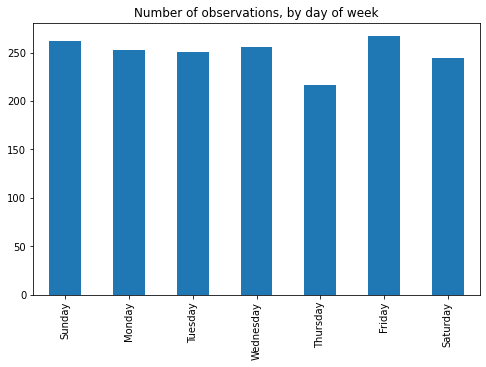

In [91]:
# calculate and plot the number of observations each day of the week has
daily_count = dt.groupby(dt.index.weekday).size()
daily_count.index = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
daily_count.plot(figsize=[8, 5], kind='bar', title='Number of observations, by day of week')